In [72]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [75]:
df = df.drop('car name', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [76]:
# Replacing the origin with categirical names
df['origin'] = df['origin'].replace({1:'america', 2:'europe', 3:'asia'})
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
225,17.5,6,250.0,110,3520,16.4,77,america
153,18.0,6,250.0,105,3459,16.0,75,america
108,20.0,4,97.0,88,2279,19.0,73,asia
300,23.9,8,260.0,90,3420,22.2,79,america
193,24.0,6,200.0,81,3012,17.6,76,america
198,33.0,4,91.0,53,1795,17.4,76,asia
106,12.0,8,350.0,180,4499,12.5,73,america
120,19.0,4,121.0,112,2868,15.5,73,europe
182,28.0,4,107.0,86,2464,15.5,76,europe
42,12.0,8,383.0,180,4955,11.5,71,america


In [77]:
df = pd.get_dummies(df, columns=['origin']) # using one hot encoding to change the categorical column origin into numerical
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
61,21.0,4,122.0,86,2226,16.5,72,1,0,0
242,21.5,4,121.0,110,2600,12.8,77,0,0,1
290,15.5,8,351.0,142,4054,14.3,79,1,0,0
386,25.0,6,181.0,110,2945,16.4,82,1,0,0
142,26.0,4,79.0,67,1963,15.5,74,0,0,1
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
44,13.0,8,400.0,175,5140,12.0,71,1,0,0
192,22.0,6,250.0,105,3353,14.5,76,1,0,0
58,25.0,4,97.5,80,2126,17.0,72,1,0,0
0,18.0,8,307.0,130,3504,12.0,70,1,0,0


In [4]:
# EDA BELOW

In [78]:
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [79]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [80]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [81]:
df.shape

(398, 10)

In [82]:
hpIsDigit = pd.DataFrame(df.horsepower.str.isdigit())

df[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [83]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [84]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.head(36)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
5,15.0,8,429.0,198,4341,10.0,70,1,0,0
6,14.0,8,454.0,220,4354,9.0,70,1,0,0
7,14.0,8,440.0,215,4312,8.5,70,1,0,0
8,14.0,8,455.0,225,4425,10.0,70,1,0,0
9,15.0,8,390.0,190,3850,8.5,70,1,0,0


In [85]:
median1 = df["horsepower"].median()
median1

93.5

In [91]:
# mean1 = df["horsepower"].mean()
# mean1

In [89]:
# Dealing with missing values from horsepower column 
df["horsepower"].replace(np.nan, median1, inplace=True)

In [90]:
df.head(36)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
5,15.0,8,429.0,198,4341,10.0,70,1,0,0
6,14.0,8,454.0,220,4354,9.0,70,1,0,0
7,14.0,8,440.0,215,4312,8.5,70,1,0,0
8,14.0,8,455.0,225,4425,10.0,70,1,0,0
9,15.0,8,390.0,190,3850,8.5,70,1,0,0


In [92]:
# Checking Duplicates
duplicate = df.duplicated()
duplicate.sum()

0

In [93]:
df[duplicate]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe


In [94]:
df['horsepower'] = df['horsepower'].astype(float)

In [95]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [97]:
# Spliting the data
X = df.drop(['mpg'], axis=1)
y = df[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)# IN industry U can't use random_state

In [98]:
# Fiting linear model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [99]:
lr.score(X_train, y_train)

0.8250538500550981

In [100]:
lr.score(X_test, y_test)

0.8094542388425914

In [108]:
# Polynomial model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)

poly_clf.score(X_train2, y_train)

0.9073813635320045

In [109]:
poly_clf.score(X_test2, y_test)

0.850402552276716

In [ ]:
# As U can see form above 2cells the score have been improved bacause of polynomial

<AxesSubplot:xlabel='mpg', ylabel='count'>

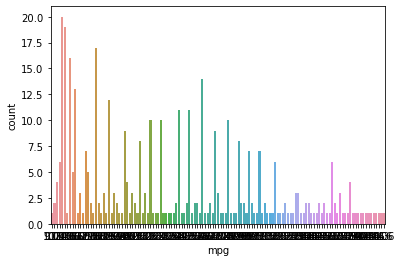

In [10]:
sns.countplot(x = 'mpg', data=df)

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'model year'}>],
       [<AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

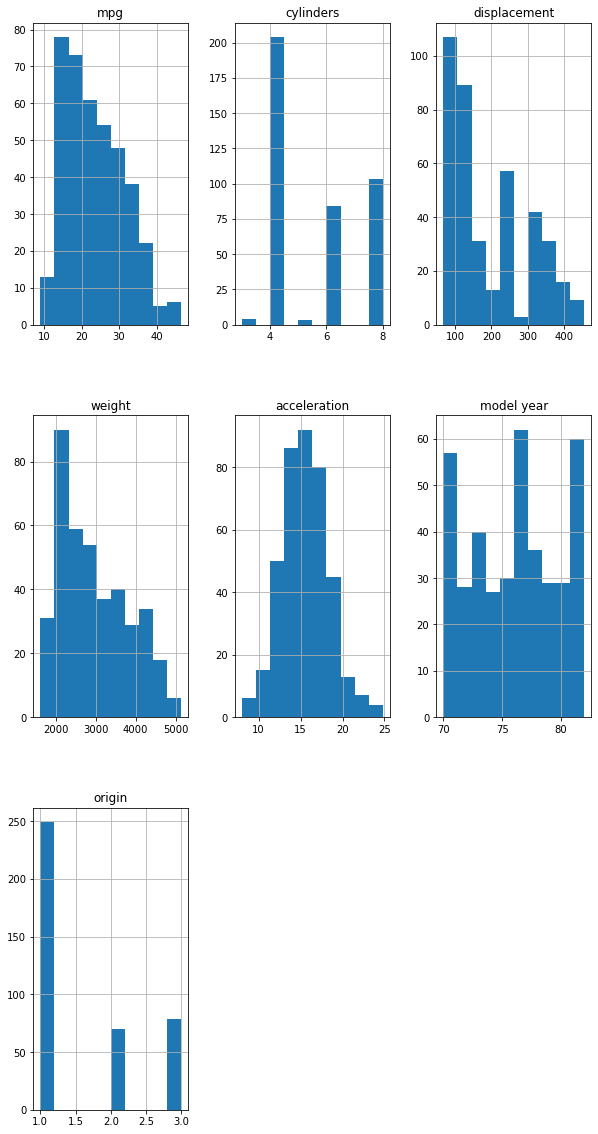

In [11]:
df.hist(figsize=(10,20))

In [12]:
corr = df.corr()
corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


<AxesSubplot:>

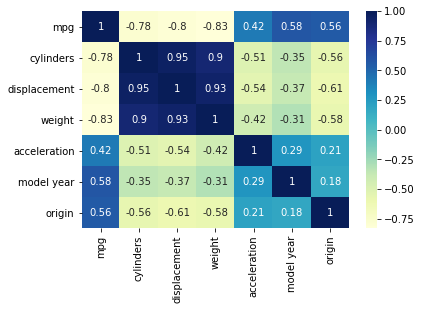

In [13]:
sns.heatmap(corr, annot=True, cmap='YlGnBu')